In [1]:
import mediapipe as mp
import numpy as np
import cv2

In [2]:
class Detector:
    def __init__(self):
        self.mp_holistic = mp.solutions.holistic # Holistic model
        self.mp_drawing = mp.solutions.drawing_utils # Drawing utilities

    def mediapipe_detection(self, image, model):
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
        image.flags.writeable = False                  # Image is no longer writeable
        results = model.process(image)                 # Make prediction
        image.flags.writeable = True                   # Image is now writeable 
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
        return image, results

    def draw_landmarks(self, image, results):
        # mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
        self.mp_drawing.draw_landmarks(image, results.pose_landmarks, self.mp_holistic.POSE_CONNECTIONS) # Draw pose connections
        self.mp_drawing.draw_landmarks(image, results.left_hand_landmarks, self.mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
        self.mp_drawing.draw_landmarks(image, results.right_hand_landmarks, self.mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

    def draw_styled_landmarks(self, image, results):
        # # Draw face connections
        # mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
        #                          mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
        #                          mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
        #                          ) 
        # Draw pose connections
        self.mp_drawing.draw_landmarks(image, results.pose_landmarks, self.mp_holistic.POSE_CONNECTIONS,
                                self.mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                                self.mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                ) 
        # Draw left hand connections
        self.mp_drawing.draw_landmarks(image, results.left_hand_landmarks, self.mp_holistic.HAND_CONNECTIONS, 
                                self.mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                                self.mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                ) 
        # Draw right hand connections  
        self.mp_drawing.draw_landmarks(image, results.right_hand_landmarks, self.mp_holistic.HAND_CONNECTIONS, 
                                self.mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                                self.mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                ) 
    
    def extract_keypoints(self, results):
        _pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]) if results.pose_landmarks else np.zeros((33, 4))
        __pose = _pose[:23,:]
        pose = __pose[11:, :].flatten()
        # face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
        lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
        rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
        # return np.concatenate([pose, face, lh, rh])
        return np.concatenate([pose, lh, rh])

    def extract_keypoints_only_handpose(self, results):
        # _pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]) if results.pose_landmarks else np.zeros((33, 4))
        # __pose = _pose[:23,:]
        # pose = __pose[11:, :].flatten()
        # face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
        lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
        rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
        # return np.concatenate([pose, face, lh, rh])
        return np.concatenate([lh, rh])

In [3]:
mp_detect = Detector()


In [36]:
times = []
x = list(range(1, 501))

In [24]:
import time

In [37]:
for j in x:
  keypoints = []
  cap = cv2.VideoCapture("C:/Users/MDaniyalK/Documents/Work/2022/Tutur-ifest app/IMG_3705.mp4")
  i = 0
  st = time.time()
  with mp_detect.mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
      
      if i < j:
        
        ret, frame = cap.read()
        if ret:
          image, results = mp_detect.mediapipe_detection(frame, holistic)
          keypoint = mp_detect.extract_keypoints(results)
          keypoints.append(keypoint)
          i+=1
      else:
        et = time.time()
        _time = et-st
        times.append(_time*1000)
        print("frames = {}".format(i))
    
        i = 0
        break


frames = 1
frames = 2
frames = 3
frames = 4
frames = 5
frames = 6
frames = 7
frames = 8
frames = 9
frames = 10
frames = 11
frames = 12
frames = 13
frames = 14
frames = 15
frames = 16
frames = 17
frames = 18
frames = 19
frames = 20
frames = 21
frames = 22
frames = 23
frames = 24
frames = 25
frames = 26
frames = 27
frames = 28
frames = 29
frames = 30
frames = 31
frames = 32
frames = 33
frames = 34
frames = 35
frames = 36
frames = 37
frames = 38
frames = 39
frames = 40
frames = 41
frames = 42
frames = 43
frames = 44
frames = 45
frames = 46
frames = 47
frames = 48
frames = 49
frames = 50
frames = 51
frames = 52
frames = 53
frames = 54
frames = 55
frames = 56
frames = 57
frames = 58
frames = 59
frames = 60
frames = 61
frames = 62
frames = 63
frames = 64
frames = 65
frames = 66
frames = 67
frames = 68
frames = 69
frames = 70
frames = 71
frames = 72
frames = 73
frames = 74
frames = 75
frames = 76
frames = 77
frames = 78
frames = 79
frames = 80
frames = 81
frames = 82
frames = 83
frames = 84
f

In [6]:
import matplotlib.pyplot as plt


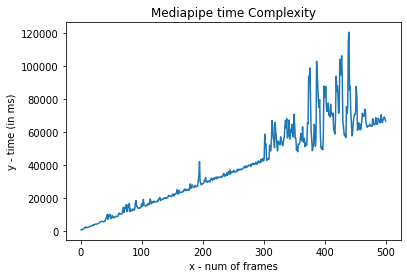

<Figure size 1440x1296 with 0 Axes>

In [41]:
plt.plot(x, times)
  
# naming the x axis
plt.xlabel('x - num of frames')
# naming the y axis
plt.ylabel('y - time (in ms)')
  
# giving a title to my graph
plt.title('Mediapipe time Complexity')
plt.figure(figsize=(20, 18))  
# function to show the plot
plt.show()

In [43]:
time_avg = []
_div = 1
for _time in times:
  time_avg.append(_time/_div)
  _div+=1

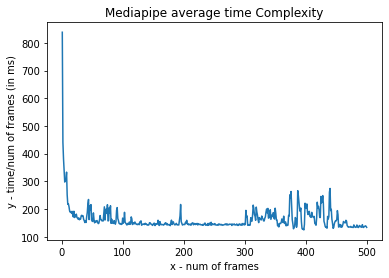

<Figure size 1440x1296 with 0 Axes>

In [44]:
plt.plot(x, time_avg)
  
# naming the x axis
plt.xlabel('x - num of frames')
# naming the y axis
plt.ylabel('y - time/num of frames (in ms)')
  
# giving a title to my graph
plt.title('Mediapipe average time Complexity')
plt.figure(figsize=(20, 18))
# function to show the plot
plt.show()